In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
data = pd.read_csv('sonar.all-data.csv')
data.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [11]:
data.isna().sum()

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
         ..
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64

### There are 60 features, from which we can predict whether the object is rock or mine

In [12]:
data['R'].value_counts()

M    111
R     96
Name: R, dtype: int64

In [13]:
data_R = data[data['R']=='R']
data_M = data[data['R']=='M']

In [14]:
data_R.head(5)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [15]:
data_M.head(5)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
96,0.0491,0.0279,0.0592,0.1270,0.1772,0.1908,0.2217,0.0768,0.1246,0.2028,...,0.0081,0.0129,0.0161,0.0063,0.0119,0.0194,0.0140,0.0332,0.0439,M
97,0.1313,0.2339,0.3059,0.4264,0.4010,0.1791,0.1853,0.0055,0.1929,0.2231,...,0.0362,0.0210,0.0154,0.0180,0.0013,0.0106,0.0127,0.0178,0.0231,M
98,0.0201,0.0423,0.0554,0.0783,0.0620,0.0871,0.1201,0.2707,0.1206,0.0279,...,0.0191,0.0182,0.0160,0.0290,0.0090,0.0242,0.0224,0.0190,0.0096,M
99,0.0629,0.1065,0.1526,0.1229,0.1437,0.1190,0.0884,0.0907,0.2107,0.3597,...,0.0089,0.0262,0.0108,0.0138,0.0187,0.0230,0.0057,0.0113,0.0131,M
100,0.0335,0.0134,0.0696,0.1180,0.0348,0.1180,0.1948,0.1607,0.3036,0.4372,...,0.0244,0.0232,0.0093,0.0159,0.0193,0.0032,0.0377,0.0126,0.0156,M


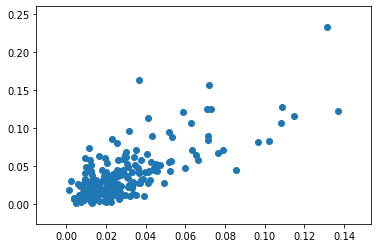

In [16]:
plt.scatter(data['0.0200'],data['0.0371'])

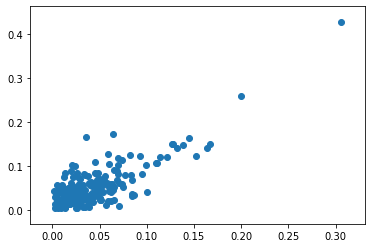

In [17]:
plt.scatter(data['0.0428'],data['0.0207'])

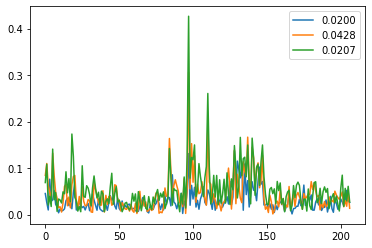

In [18]:
plt.plot(data['0.0200'], label='0.0200')
plt.plot(data['0.0428'], label='0.0428')
plt.plot(data['0.0207'], label='0.0207')
plt.legend()

In [19]:
from sklearn.model_selection import train_test_split
X=data.drop('R', axis=1)
y=data['R']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=29)

In [21]:
print(X_train.shape)
print(X_test.shape)

(165, 60)
(42, 60)


In [37]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Classification

### KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier()

In [40]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
knn.score(X_test, y_test)

0.8095238095238095

#### Accuracy: 80.85.2%

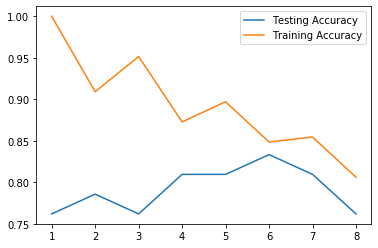

In [87]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.show()

#### Maximum accuracy is obtained when k=3 or 4

In [43]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X=X_train, y=y_train)
knn.score(X_test, y_test)

0.8095238095238095

#### Accuracy: 80.95%

In [52]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[24,  4],
       [ 4, 10]], dtype=int64)

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           M       0.92      0.86      0.89        28
           R       0.75      0.86      0.80        14

    accuracy                           0.86        42
   macro avg       0.84      0.86      0.84        42
weighted avg       0.87      0.86      0.86        42



In [59]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8809523809523809

In [60]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[27,  1],
       [ 4, 10]], dtype=int64)

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           M       0.87      0.96      0.92        28
           R       0.91      0.71      0.80        14

    accuracy                           0.88        42
   macro avg       0.89      0.84      0.86        42
weighted avg       0.88      0.88      0.88        42



In [62]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
from sklearn.metrics import confusion_matrix
y_pred = svm.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[24,  4],
       [ 2, 12]], dtype=int64)

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           M       0.92      0.86      0.89        28
           R       0.75      0.86      0.80        14

    accuracy                           0.86        42
   macro avg       0.84      0.86      0.84        42
weighted avg       0.87      0.86      0.86        42



In [68]:
from sklearn.decomposition import PCA
pca = PCA()
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [69]:
print(pca.explained_variance_ratio_)

[2.09407774e-01 1.91318703e-01 8.19160414e-02 5.80198483e-02
 4.65768043e-02 3.91978732e-02 3.56650693e-02 3.17578213e-02
 2.73623654e-02 2.67382689e-02 2.09406140e-02 1.89339637e-02
 1.80193804e-02 1.52959284e-02 1.41614318e-02 1.36089092e-02
 1.26034761e-02 1.14149849e-02 9.60702835e-03 9.38431399e-03
 8.76167832e-03 8.49468549e-03 8.09536415e-03 7.62861486e-03
 6.64781196e-03 6.26300173e-03 5.69278127e-03 5.48783638e-03
 5.00254335e-03 4.68403536e-03 4.34932122e-03 3.74422252e-03
 3.49859742e-03 3.16520620e-03 2.96309002e-03 2.82783805e-03
 2.72879200e-03 2.18533206e-03 1.90625843e-03 1.78755016e-03
 1.54062567e-03 1.23062227e-03 1.15560456e-03 1.10486178e-03
 9.50320212e-04 9.25576925e-04 8.58704326e-04 6.40994451e-04
 5.60821219e-04 5.07356638e-04 4.12855573e-04 3.71578089e-04
 3.40150903e-04 3.33641106e-04 2.98006714e-04 2.68402611e-04
 2.32276891e-04 1.85499241e-04 1.35248581e-04 1.01690959e-04]


In [70]:
print(pca.singular_values_)

[45.53171382 43.52074405 28.47751411 23.96657043 21.47348045 19.69921178
 18.79053447 17.73139674 16.45865783 16.2698759  14.39833597 13.69110078
 13.35634179 12.30567718 11.84053104 11.6072478  11.17024681 10.63053859
  9.75241409  9.63870886  9.3134642   9.17046271  8.952324    8.69041352
  8.11254204  7.87424391  7.50723215  7.37086021  7.03741281  6.8096953
  6.56188084  6.08833335  5.88524549  5.59781577  5.41614173  5.29108654
  5.19759952  4.65132104  4.34418674  4.20675012  3.90540575  3.49043844
  3.38237862  3.30728462  3.06727405  3.02707971  2.91567708  2.51909608
  2.35629584  2.24116727  2.02169982  1.91797369  1.83507328  1.81742866
  1.71763397  1.63008768  1.51642383  1.35515405  1.1571348   1.00336458]


In [73]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_pca.shape

(165, 60)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X=X_train_pca, y=y_train_pca)
knn.score(X_test_pca, y_test_pca)

0.7142857142857143

In [75]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X=X_train_pca, y=y_train_pca)
knn.score(X_test_pca, y_test_pca)

0.7857142857142857

In [76]:
from sklearn.metrics import confusion_matrix
y_pred_pca = knn.predict(X_test_pca)
confusion_matrix(y_test_pca, y_pred_pca)

array([[16,  4],
       [ 5, 17]], dtype=int64)

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test_pca, y_pred_pca))

              precision    recall  f1-score   support

           M       0.76      0.80      0.78        20
           R       0.81      0.77      0.79        22

    accuracy                           0.79        42
   macro avg       0.79      0.79      0.79        42
weighted avg       0.79      0.79      0.79        42



In [78]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_pca, y_train_pca)
clf.score(X_test_pca, y_test_pca)

0.7380952380952381

In [79]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_pca, y_train_pca)
clf.score(X_test_pca, y_test_pca)

0.7380952380952381

In [80]:
from sklearn.metrics import confusion_matrix
y_pred_pca = clf.predict(X_test_pca)
confusion_matrix(y_test_pca, y_pred_pca)

array([[14,  6],
       [ 5, 17]], dtype=int64)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test_pca, y_pred_pca))

              precision    recall  f1-score   support

           M       0.74      0.70      0.72        20
           R       0.74      0.77      0.76        22

    accuracy                           0.74        42
   macro avg       0.74      0.74      0.74        42
weighted avg       0.74      0.74      0.74        42



In [82]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_pca, y_train_pca)
svm.score(X_test_pca, y_test_pca)

0.8095238095238095

In [83]:
from sklearn.metrics import confusion_matrix
y_pred_pca = svm.predict(X_test_pca)
confusion_matrix(y_test_pca, y_pred_pca)

array([[20,  0],
       [ 8, 14]], dtype=int64)

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test_pca, y_pred_pca))

              precision    recall  f1-score   support

           M       0.71      1.00      0.83        20
           R       1.00      0.64      0.78        22

    accuracy                           0.81        42
   macro avg       0.86      0.82      0.81        42
weighted avg       0.86      0.81      0.80        42

